# หาหุ้นที่ลงแรงที่สุดใน set100

In [45]:
import starfishX as sx
import starfishX.utilHelpers as ut

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [46]:
df = sx.getMemberOfIndex(sx.indexMarket.SET100)
df = np.append(df,['BTG','SFT','MC','KGI','ASP','MEB','BBGI','PTG','SUSCO','FPI','PSTC'])
df

array(['AAV', 'ACE', 'ADVANC', 'AMATA', 'AOT', 'AP', 'AWC', 'BAM',
       'BANPU', 'BBL', 'BCH', 'BCP', 'BCPG', 'BDMS', 'BEC', 'BEM',
       'BGRIM', 'BH', 'BLA', 'BTS', 'BYD', 'CBG', 'CENTEL', 'CHG', 'CK',
       'CKP', 'COM7', 'CPALL', 'CPF', 'CPN', 'CRC', 'DELTA', 'DOHOME',
       'EA', 'EGCO', 'EPG', 'ESSO', 'FORTH', 'GLOBAL', 'GPSC', 'GULF',
       'GUNKUL', 'HANA', 'HMPRO', 'INTUCH', 'IRPC', 'IVL', 'JAS', 'JMART',
       'JMT', 'KBANK', 'KCE', 'KEX', 'KKP', 'KTB', 'KTC', 'LH', 'MEGA',
       'MINT', 'MTC', 'NEX', 'ONEE', 'OR', 'ORI', 'OSP', 'PLANB', 'PSL',
       'PTG', 'PTT', 'PTTEP', 'PTTGC', 'QH', 'RATCH', 'RBF', 'RCL',
       'SABUY', 'SAWAD', 'SCB', 'SCC', 'SCGP', 'SINGER', 'SJWD', 'SPALI',
       'SPRC', 'STA', 'STARK', 'STGT', 'TCAP', 'THANI', 'THG', 'TIDLOR',
       'TIPH', 'TISCO', 'TOP', 'TQM', 'TRUE', 'TTB', 'TU', 'VGI', 'WHA',
       'BTG', 'SFT', 'MC', 'KGI', 'ASP', 'MEB', 'BBGI', 'PTG', 'SUSCO',
       'FPI', 'PSTC'], dtype=object)

In [31]:
obj = ut.HistStockPrice()

you are using nologin method, data you access may be limited


In [ ]:
symbol,change =[],[]
for i in df:
  try:   
    tmp = obj.getPrice(symbol=i,start='2023-01-01',stop='2023-03-14')
    b = tmp[i].head(1).values[0]
    e = tmp[i].tail(1).values[0]
    pct = (e/b)-1
    symbol.append(i)
    change.append(pct)
  except:
    print(i,end=' ')
    pass

In [ ]:
len(symbol),len(change)

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,5)

rp = pd.DataFrame({'symbol':symbol,'pct_change':change})
rp = rp.sort_values('pct_change').head(50)
plt.subplots(facecolor='white')
plt.xticks(rotation=45)
plt.title('2022-01-01 - 2022-03-14')
plt.bar(x=rp['symbol'],height=rp['pct_change'])

In [32]:
# ตั้งแต่ มีนาคมมา หุ้นไหนลงมาแรงที่สุด

symbol,change =[],[]
for i in df:
  try:   
    tmp = obj.getPrice(symbol=i,start='2023-03-01',stop='2023-03-14')
    b = tmp[i].head(1).values[0]
    e = tmp[i].tail(1).values[0]
    pct = (e/b)-1
    symbol.append(i)
    change.append(pct)
  except:
    print(i,end=' ')
    pass

STARK 

<BarContainer object of 50 artists>

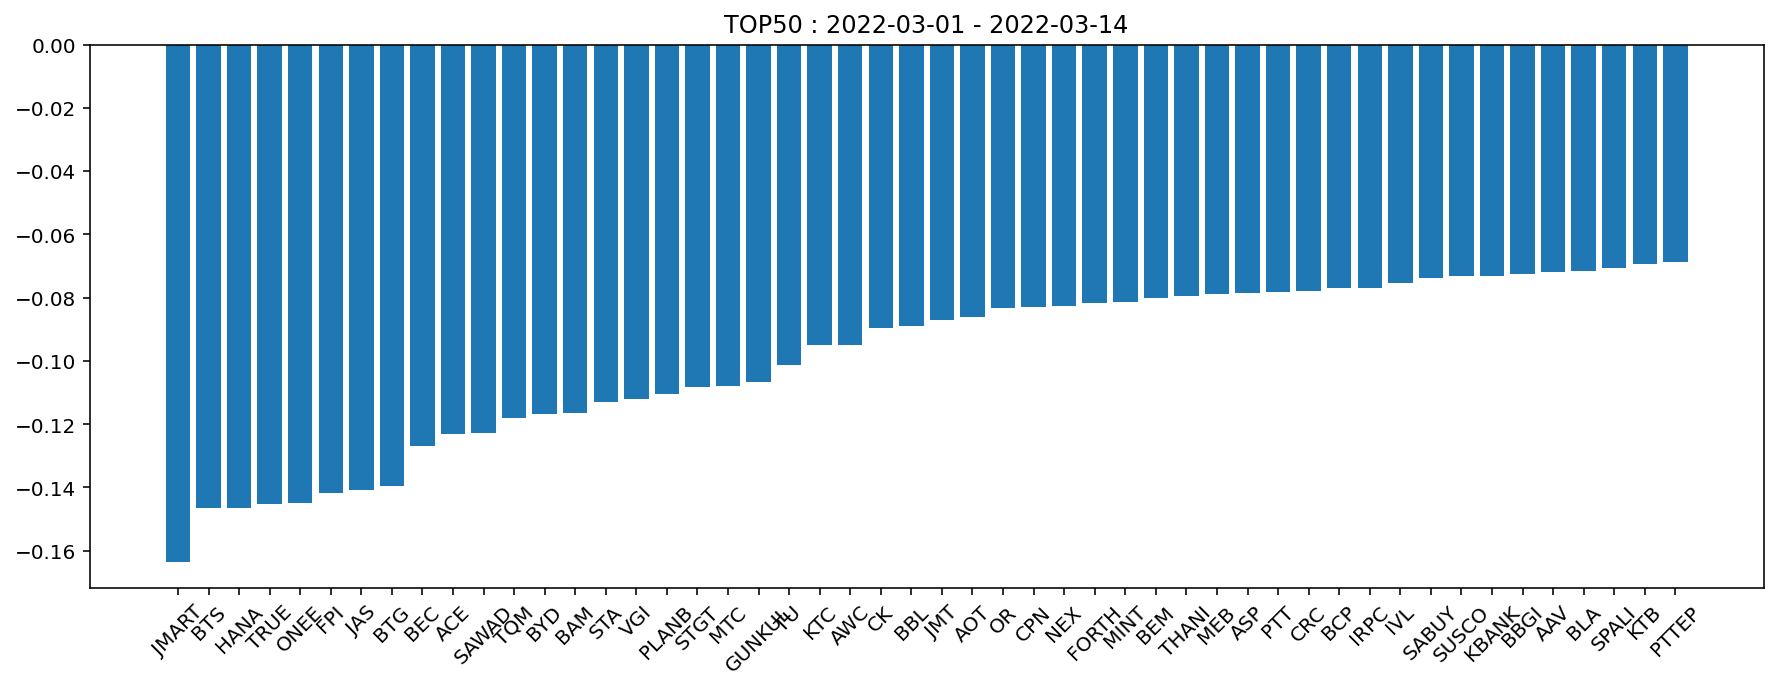

In [33]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,5)

rp = pd.DataFrame({'symbol':symbol,'pct_change':change})
rp = rp.sort_values('pct_change').head(50)
plt.subplots(facecolor='white')
plt.xticks(rotation=45)
plt.title('TOP50 : 2022-03-01 - 2022-03-14')
plt.bar(x=rp['symbol'],height=rp['pct_change'])

In [ ]:
rp

In [34]:
# PE เทียบ ROE
symbol,pe,roe,pe_roe =[],[],[],[]
for i in df:
  try:   
    #tmp = obj.getPrice(symbol=i,start='2023-01-01',stop='2023-03-14')
    #b = tmp[i].head(1).values[0]
    #e = tmp[i].tail(1).values[0]
    #pct = (e/b)-1
    pe_data = ut.getRatio(i,'pe')
    roe_data = ut.getRatio(i,'roe')
    pe_roe_data = pe_data / roe_data 
    
    symbol.append(i)
    pe.append(pe_data)
    roe.append(roe_data)
    pe_roe.append(pe_roe_data)
    
    
  except:
    print(i,end=' ')
    pass

AAV AOT BGRIM BYD IRPC JAS KEX PTTGC TRUE PSTC 

In [35]:
ut.getRatio('AAV','roe')

-57.04033513407205

<BarContainer object of 20 artists>

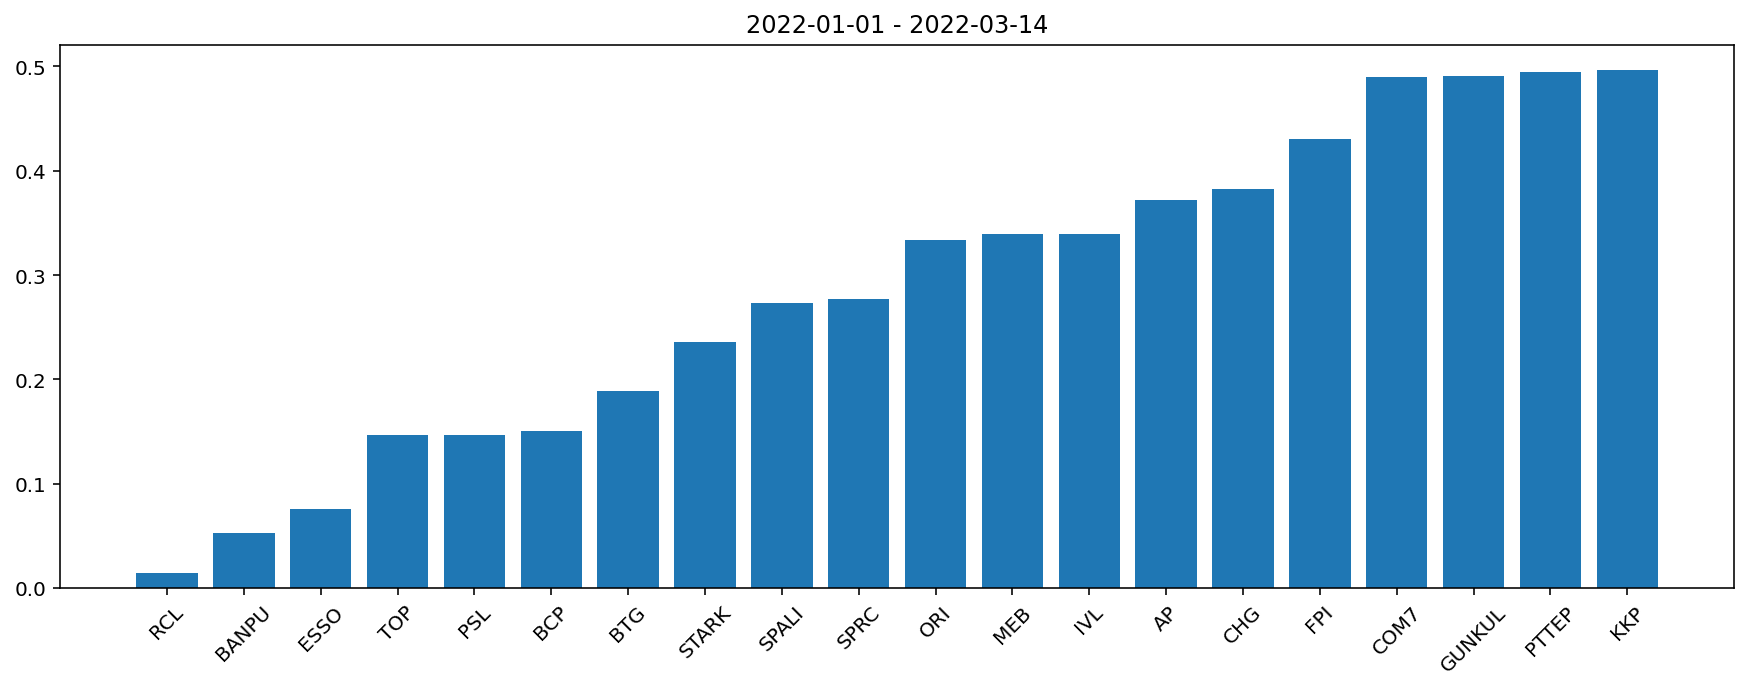

In [55]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,5)

rp = pd.DataFrame({'symbol':symbol,'pe':pe,'roe':roe,'pe_roe':pe_roe})
rp = rp.sort_values('pe_roe').head(20)
plt.subplots(facecolor='white')
plt.xticks(rotation=45)
plt.title('2022-01-01 - 2022-03-14')
plt.bar(x=rp['symbol'],height=rp['pe_roe'])

In [64]:
ut.getRatio('TIPH','pe')/ut.getRatio('TIPH','roe')

1.7255068097901305

In [63]:
i = 'TIPH'
tmp = obj.getPrice(symbol=i,start='2023-03-01',stop='2023-03-14')
b = tmp[i].head(1).values[0]
e = tmp[i].tail(1).values[0]
pct = (e/b)-1
pct

-0.06666666666666665